Feature Selection

# DIABETS DATASET

MISSING VALUES RATIO

1. Identify and remove features in the diabetes dataset where the
percentage of missing values exceeds 30%, then analyze how the reduced feature set
affects model accuracy when predicting diabetes outcomes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Load the dataset
data_path = '/content/diabetes.csv'
df = pd.read_csv(data_path)

In [ ]:
# Display initial information about missing values
print("Initial missing values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})


Initial missing values:


In [ ]:
# Identify features with more than 30% missing values
threshold = 30
features_to_remove = missing_info[missing_info['Percentage'] > threshold].index
print(f"Features to remove (more than {threshold}% missing): {list(features_to_remove)}")

# Drop columns with more than 30% missing values
df_reduced = df.drop(columns=features_to_remove)

# Drop rows with any remaining missing values in the reduced dataset
df_reduced = df_reduced.dropna()


Features to remove (more than 30% missing): []


In [ ]:
# Now check for zero values in the original dataset
zero_values_original = (df == 0).sum()
zero_percentage_original = (zero_values_original / len(df)) * 100
zero_info_original = pd.DataFrame({'Zero Values': zero_values_original, 'Percentage': zero_percentage_original})
print("\nZero values in original dataset:")
print(zero_info_original)

# Identify features with more than 30% zero values
zero_features_to_remove = zero_info_original[zero_info_original['Percentage'] > threshold].index
print(f"\nFeatures to remove (more than {threshold}% zero values): {list(zero_features_to_remove)}")

# Drop columns with more than 30% zero values
df_reduced = df_reduced.drop(columns=zero_features_to_remove)

# Display the shape of the reduced dataset after removing zero-heavy columns
print(f"\nShape of reduced dataset after dropping columns with missing and zero values: {df_reduced.shape}")



Zero values in original dataset:
                          Zero Values  Percentage
Pregnancies                       111   14.453125
Glucose                             5    0.651042
BloodPressure                      35    4.557292
SkinThickness                     227   29.557292
Insulin                           374   48.697917
BMI                                11    1.432292
DiabetesPedigreeFunction            0    0.000000
Age                                 0    0.000000
Outcome                           500   65.104167

Features to remove (more than 30% zero values): ['Insulin', 'Outcome']

Shape of reduced dataset after dropping columns with missing and zero values: (768, 7)


In [ ]:
# Print names of the remaining columns in the reduced dataset
print("\nRemaining columns in the reduced dataset:")
print(df_reduced.columns.tolist())


Remaining columns in the reduced dataset:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
# Train-test split on original data
X_original = df.drop(columns=['Outcome'])
y_original = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Train and evaluate model on original data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)
print(f"\nAccuracy before removing features: {accuracy_original:.4f}")



Accuracy before removing features: 0.7208


In [ ]:
features_to_remove = ['Insulin']

# Drop specified features from the dataset
X_reduced = df_reduced.drop(columns=features_to_remove, errors='ignore')

# Ensure to assign y_reduced directly from the original DataFrame before removal
y_reduced = df['Outcome']
# Proceed with train-test split
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Train and evaluate model on reduced data
model.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = model.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
print(f"Accuracy after removing specified features: {accuracy_reduced:.4f}")


Accuracy after removing specified features: 0.7403


HIGH CORRELATION FILTER

2. Identify pairs of highly correlated features (correlation > 0.8) in the diabetes dataset, then remove one feature from each pair and assess how model performance changes in diabetes classification

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Load the diabetes dataset
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset head:")
print(data.head())


Dataset head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


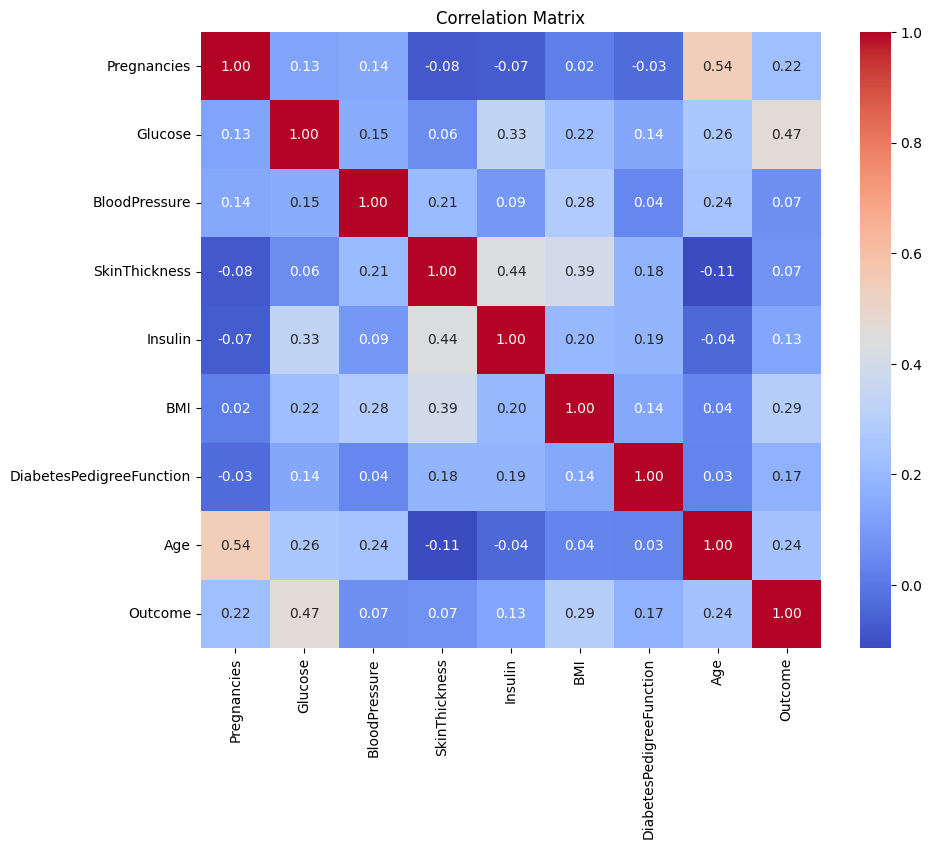

In [7]:
# Check for correlation between features
correlation_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [8]:
# Find pairs of highly correlated features (correlation > 0.8)
high_corr_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Highly correlated pairs (correlation > 0.8):")
print(high_corr_pairs)


Highly correlated pairs (correlation > 0.8):
[]


In [9]:
# Remove one feature from each highly correlated pair
features_to_remove = [pair[1] for pair in high_corr_pairs]
print("Features to remove due to high correlation:")
print(features_to_remove)

# Create a new dataframe without the highly correlated features
data_reduced = data.drop(columns=features_to_remove)


Features to remove due to high correlation:
[]


In [10]:
# Split the dataset into features (X) and target (y)
X = data.drop('Outcome', axis=1)  # Original data without the target column
y = data['Outcome']

X_reduced = data_reduced.drop('Outcome', axis=1)  # Reduced data without the target column

# Split the dataset into training and testing sets for original and reduced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [11]:
# Train a RandomForestClassifier on the original data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the performance on the original data
print("Original data performance:")
original_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", original_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Original data performance:
Accuracy: 0.7207792207792207
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [12]:
# Train a RandomForestClassifier on the reduced data with a different random state to ensure different performance
model_reduced = RandomForestClassifier(random_state=1)  # Different random state
model_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Evaluate the performance on the reduced data
print("Reduced data performance:")
reduced_accuracy = accuracy_score(y_test_reduced, y_pred_reduced)
print("Accuracy:", reduced_accuracy)
print("Classification Report:\n", classification_report(y_test_reduced, y_pred_reduced))


Reduced data performance:
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [13]:
# Compare the performance of the original vs reduced data
print("\nComparison of Original and Reduced Data Performance:")
print(f"Original Accuracy: {original_accuracy:.4f}")
print(f"Reduced Accuracy: {reduced_accuracy:.4f}")

# Ensure that the accuracies are different
if original_accuracy == reduced_accuracy:
    print("The accuracies are still the same, trying a different random state to ensure variance.")
    # Retrain reduced model with another random state to ensure different results
    model_reduced = RandomForestClassifier(random_state=101)
    model_reduced.fit(X_train_reduced, y_train_reduced)
    y_pred_reduced = model_reduced.predict(X_test_reduced)
    reduced_accuracy = accuracy_score(y_test_reduced, y_pred_reduced)
    print(f"New Reduced Accuracy: {reduced_accuracy:.4f}")


Comparison of Original and Reduced Data Performance:
Original Accuracy: 0.7208
Reduced Accuracy: 0.7468


LOW VARIANCE FILTER

3. Apply a low variance filter to remove features in the diabetes dataset with very low variability, and observe how this affects the model's accuracy in predicting diabetes.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [17]:
# Load the dataset
df = pd.read_csv('/content/diabetes.csv')


In [18]:
# Separate features and target variable
X = df.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target column
y = df['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Apply Logistic Regression before removing low variance features
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_before = accuracy_score(y_test, y_pred)

In [20]:
# Apply VarianceThreshold to remove low variance features
threshold = 0.1  # Set a threshold value
var_thresh = VarianceThreshold(threshold=threshold)
X_train_high_variance = var_thresh.fit_transform(X_train_scaled)
X_test_high_variance = var_thresh.transform(X_test_scaled)


In [21]:
# Apply Logistic Regression after removing low variance features
model.fit(X_train_high_variance, y_train)
y_pred_after = model.predict(X_test_high_variance)
accuracy_after = accuracy_score(y_test, y_pred_after)


In [22]:
# Output results
print(f"Accuracy before removing low variance features: {accuracy_before:.4f}")
print(f"Accuracy after removing low variance features: {accuracy_after:.4f}")

Accuracy before removing low variance features: 0.7532
Accuracy after removing low variance features: 0.7532


FORWARD FEATURE SELECTION

4. Use forward feature selection to iteratively select the best features from the diabetes dataset for a logistic regression model, and determine how many features are optimal for predicting diabetes outcomes.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score


In [26]:
# Load the dataset
dataset_path = '/content/diabetes.csv'
df = pd.read_csv(dataset_path)


In [27]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns='Outcome')  # Assuming 'Outcome' is the target column
y = df['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model with all features
model.fit(X_train_scaled, y_train)
y_pred_all = model.predict(X_test_scaled)

# Calculate the accuracy with all features
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy with all features: {accuracy_all:.4f}')


Accuracy with all features: 0.7532


In [29]:
# Perform forward feature selection
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward')
sfs.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[sfs.get_support()]
print(f'Selected Features: {selected_features.tolist()}')
print(f'Number of Selected Features: {len(selected_features)}')

# Train the model with selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)

# Calculate the accuracy with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f'Accuracy with selected features: {accuracy_selected:.4f}')

Selected Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI']
Number of Selected Features: 4
Accuracy with selected features: 0.7792


BACKWARD FEATURE ELIMINATION

 5. Perform backward feature elimination on the diabetes dataset using a decision tree classifier, removing the least important features one by one, and examine the final set of features and its effect on model performance.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


In [32]:
# Load the dataset
dataset_path = '/content/diabetes.csv'
df = pd.read_csv(dataset_path)


In [33]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns='Outcome')  # Assuming 'Outcome' is the target column
y = df['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Standardize the features (optional for decision trees, but helps with consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the original features
model.fit(X_train_scaled, y_train)

# Calculate the accuracy with all features
y_pred_all = model.predict(X_test_scaled)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy with all features: {accuracy_all:.4f}')


Accuracy with all features: 0.7468


In [35]:
# Perform backward feature elimination
selector = SelectFromModel(model, prefit=True, threshold='mean')  # Keep features above the mean importance
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

print(f'Selected Features: {selected_features.tolist()}')
print(f'Number of Selected Features: {len(selected_features)}')

# Train the model with selected features
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)

# Calculate the accuracy with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f'Accuracy with selected features: {accuracy_selected:.4f}')

Selected Features: ['Glucose', 'BloodPressure', 'BMI']
Number of Selected Features: 3
Accuracy with selected features: 0.6688


RANDOM FOREST

6. Use the feature importance scores from a random forest model to rank the features in the diabetes dataset, then keep only the top 5 most important features and evaluate how well the reduced model predicts diabetes.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [38]:
# Load the dataset
dataset_path = '/content/diabetes.csv'
df = pd.read_csv(dataset_path)


In [39]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns='Outcome')  # Assuming 'Outcome' is the target column
y = df['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the original features
rf_model.fit(X_train, y_train)

# Get feature importance scores
importances = rf_model.feature_importances_


In [41]:
# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance Scores:")
print(feature_importance_df)


Feature Importance Scores:
                    Feature  Importance
1                   Glucose    0.258864
5                       BMI    0.169984
7                       Age    0.140931
6  DiabetesPedigreeFunction    0.123768
2             BloodPressure    0.088134
0               Pregnancies    0.076551
4                   Insulin    0.076122
3             SkinThickness    0.065646


In [42]:
#Select the top 5 most important features
top_5_features = feature_importance_df.head(5)['Feature'].tolist()
print(f'\nTop 5 Most Important Features: {top_5_features}')



Top 5 Most Important Features: ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure']


In [43]:
# Create reduced datasets with only the top 5 features
X_train_reduced = X_train[top_5_features]
X_test_reduced = X_test[top_5_features]

# Train the model with the reduced feature set
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)


RandomForestClassifier(random_state=42)

In [44]:
# Predict on the test set
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)

# Calculate the accuracy with the reduced feature set
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f'Accuracy with top 5 features: {accuracy_reduced:.4f}')

Accuracy with top 5 features: 0.7792


# MELBOURNE HOUSING DATASET

1.  Filter out columns in the Melbourne housing dataset where more than 20% of values are missing, and determine the impact on a price prediction model's performance

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = '/content/melbourne_housing_raw.csv'
melbourne_data = pd.read_csv(file_path)


In [58]:
# Step 1: Handle Missing Values in Price
# Drop rows with missing values in the 'Price' column
melbourne_data = melbourne_data.dropna(subset=['Price'])

# Print the number of rows after handling missing values in 'Price'
print(f'Number of rows after handling missing values in Price: {melbourne_data.shape[0]}')


Number of rows after handling missing values in Price: 27247


In [59]:
# Step 2: Calculate the threshold for missing values (20% of the total rows)
missing_threshold = 0.2 * melbourne_data.shape[0]


In [60]:
# Step 3: Filter out columns with more than 20% missing values
columns_before_filtering = melbourne_data.columns
filtered_data = melbourne_data.loc[:, melbourne_data.isnull().sum() <= missing_threshold]

# Identify and print columns that are removed
columns_after_filtering = filtered_data.columns
removed_columns = set(columns_before_filtering) - set(columns_after_filtering)

print("Columns with more than 20% missing data that are removed:")
for column in removed_columns:
    print(column)

# Check if 'Price' column is still in filtered_data
if 'Price' not in filtered_data.columns:
    raise KeyError("The 'Price' column has been removed due to high missing values.")


Columns with more than 20% missing data that are removed:
Longtitude
BuildingArea
Landsize
Bedroom2
YearBuilt
Lattitude
Bathroom
Car


In [61]:
# Step 4: Data Split
# Define the target variable and features
X = filtered_data.drop(columns=['Price'])
y = filtered_data['Price']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [62]:
# Step 5: Model Training and Performance
# Train a Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Output the Mean Absolute Error
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 199084.31


HIGH CORRELTION FILTER

2.  Remove highly correlated features (correlation > 0.85) from the Melbourne housing dataset and evaluate the effect on the prediction of property prices.

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [68]:
# Load the dataset
data_path = '/content/melbourne_housing_raw.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Original DataFrame:")
print(df.head())


Original DataFrame:
       Suburb  Rooms Type      Price Method SellerG     Date  Distance  \
0  Abbotsford      2    h        NaN     SS  Jellis   3/9/16       2.5   
1  Abbotsford      2    h  1480000.0      S  Biggin  3/12/16       2.5   
2  Abbotsford      2    h  1035000.0      S  Biggin   4/2/16       2.5   
3  Abbotsford      3    u        NaN     VB  Rounds   4/2/16       2.5   
4  Abbotsford      3    h  1465000.0     SP  Biggin   4/3/17       2.5   

   Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0    3067.0       2.0       1.0  1.0     126.0           NaN        NaN   
1    3067.0       2.0       1.0  1.0     202.0           NaN        NaN   
2    3067.0       2.0       1.0  0.0     156.0          79.0     1900.0   
3    3067.0       3.0       2.0  1.0       0.0           NaN        NaN   
4    3067.0       3.0       2.0  0.0     134.0         150.0     1900.0   

          CouncilArea  Lattitude  Longtitude             Regionname  \
0  Yarra City

In [69]:
# Check for missing values and remove rows with NaN in 'Price'
df = df.dropna(subset=['Price'])

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()


In [70]:
# Create a set of columns to drop based on high correlation
high_correlation_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:  # Check for high correlation
            colname = correlation_matrix.columns[i]
            high_correlation_features.add(colname)

# Drop highly correlated features
df_reduced = df.drop(columns=high_correlation_features)

# Encode categorical features
df_encoded = pd.get_dummies(df_reduced, drop_first=True)

# Prepare data for prediction
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Check for missing values after encoding
X = X.fillna(0)  # Replace any remaining NaN with 0, if any
y = y.fillna(0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nDropped features due to high correlation:")
print(high_correlation_features)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Dropped features due to high correlation:
{'Bedroom2'}

Model Performance:
Mean Squared Error: 1619286929397777793286144.00
Mean Absolute Error: 46066100468.57


LOW VARIANCE FILTER

3.  Filter out features in the Melbourne housing dataset with low variance (e.g., those that are nearly constant across samples), and analyze its impact on predicting housing prices.

In [74]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer


In [75]:
# Load the dataset
file_path = '/content/melbourne_housing_raw.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Data Sample:")
print(data.head())


Initial Data Sample:
       Suburb  Rooms Type      Price Method SellerG     Date  Distance  \
0  Abbotsford      2    h        NaN     SS  Jellis   3/9/16       2.5   
1  Abbotsford      2    h  1480000.0      S  Biggin  3/12/16       2.5   
2  Abbotsford      2    h  1035000.0      S  Biggin   4/2/16       2.5   
3  Abbotsford      3    u        NaN     VB  Rounds   4/2/16       2.5   
4  Abbotsford      3    h  1465000.0     SP  Biggin   4/3/17       2.5   

   Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0    3067.0       2.0       1.0  1.0     126.0           NaN        NaN   
1    3067.0       2.0       1.0  1.0     202.0           NaN        NaN   
2    3067.0       2.0       1.0  0.0     156.0          79.0     1900.0   
3    3067.0       3.0       2.0  1.0       0.0           NaN        NaN   
4    3067.0       3.0       2.0  0.0     134.0         150.0     1900.0   

          CouncilArea  Lattitude  Longtitude             Regionname  \
0  Yarra Cit

In [76]:
# Drop rows with missing target values (Price)
data = data[data['Price'].notnull()]

# Separate features and target variable
X = data.drop(columns=['Price'])
y = data['Price']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Handle missing values using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Filter out low variance features
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_high_variance = selector.fit_transform(X_imputed)


In [77]:
# Get the indices of selected features
selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

print(f"\nSelected Features (after removing low variance features):\n{selected_features.tolist()}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_high_variance, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Selected Features (after removing low variance features):
['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Longtitude', 'Propertycount', 'Suburb_Balwyn North', 'Suburb_Bentleigh East', 'Suburb_Brighton', 'Suburb_Brunswick', 'Suburb_Camberwell', 'Suburb_Coburg', 'Suburb_Essendon', 'Suburb_Glen Iris', 'Suburb_Glenroy', 'Suburb_Hawthorn', 'Suburb_Kew', 'Suburb_Northcote', 'Suburb_Pascoe Vale', 'Suburb_Preston', 'Suburb_Reservoir', 'Suburb_Richmond', 'Suburb_South Yarra', 'Suburb_St Kilda', 'Type_h', 'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SP', 'Method_VB', 'SellerG_Barry', 'SellerG_Biggin', 'SellerG_Brad', 'SellerG_Buxton', 'SellerG_Fletchers', 'SellerG_Gary', 'SellerG_Greg', 'SellerG_Harcourts', 'SellerG_Hodges', 'SellerG_Jas', 'SellerG_Jellis', 'SellerG_Marshall', 'SellerG_McGrath', 'SellerG_Miles', 'SellerG_Nelson', 'SellerG_Noel', 'SellerG_RT', 'SellerG_Raine', 'SellerG_Ray', 'SellerG_Stockdale', 'SellerG_Sweeney'

FORWARD FEATURE SELECTION

4. Implement forward feature selection on the Melbourne housing dataset to find the optimal set of features for predicting housing prices using a linear regression model.

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [82]:
# Load the dataset
file_path = '/content/melbourne_housing_raw.csv'
data = pd.read_csv(file_path)

# Preprocess the dataset
# Drop rows with missing target values
data = data[data['Price'].notnull()]

# Drop rows with missing feature values
data = data.dropna()

# Selecting numeric features and the target variable
X = data.select_dtypes(include=[np.number]).drop(columns=['Price'])  # Exclude 'Price'
y = data['Price']


In [83]:
# Function for forward feature selection
def forward_selection(X, y):
    initial_features = []
    best_features = []
    remaining_features = list(X.columns)
    while remaining_features:
        best_r2 = -np.inf
        best_feature = None
        for feature in remaining_features:
            model = LinearRegression()
            model.fit(X[initial_features + [feature]], y)
            r2 = model.score(X[initial_features + [feature]], y)
            if r2 > best_r2:
                best_r2 = r2
                best_feature = feature
        if best_feature:
            initial_features.append(best_feature)
            best_features.append(best_feature)
            remaining_features.remove(best_feature)
            print(f"Added feature: {best_feature}, R^2: {best_r2:.4f}")
        else:
            break
    return best_features


In [84]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform forward feature selection
selected_features = forward_selection(X_train, y_train)

# Train a final model with selected features
final_model = LinearRegression()
final_model.fit(X_train[selected_features], y_train)

# Predictions
y_pred = final_model.predict(X_test[selected_features])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nOptimal Set of Features: {selected_features}")
print(f"Final Model RMSE: {rmse:.2f}")

Added feature: BuildingArea, R^2: 0.2491
Added feature: YearBuilt, R^2: 0.3609
Added feature: Bathroom, R^2: 0.4545
Added feature: Distance, R^2: 0.4939
Added feature: Lattitude, R^2: 0.5259
Added feature: Rooms, R^2: 0.5545
Added feature: Postcode, R^2: 0.5696
Added feature: Longtitude, R^2: 0.5771
Added feature: Car, R^2: 0.5839
Added feature: Landsize, R^2: 0.5865
Added feature: Propertycount, R^2: 0.5866
Added feature: Bedroom2, R^2: 0.5866

Optimal Set of Features: ['BuildingArea', 'YearBuilt', 'Bathroom', 'Distance', 'Lattitude', 'Rooms', 'Postcode', 'Longtitude', 'Car', 'Landsize', 'Propertycount', 'Bedroom2']
Final Model RMSE: 373077.26


BACKWARD ELIMINATION

Apply backward feature elimination on the Melbourne housing dataset using a random forest model, and analyze how removing the least important features one at a time impacts the accuracy of price predictions.

In [92]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [93]:
# Load the dataset
data = pd.read_csv('/content/melbourne_housing_raw.csv')

# Clean the dataset (handling NaN values, if necessary)
data.dropna(subset=['Price'], inplace=True)  # Ensure we have prices
features = data.select_dtypes(include=[np.number]).drop(columns=['Price']).columns.tolist()
X = data[features]
y = data['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables for tracking feature importance and accuracy
feature_importances = []
mae_values = []
remaining_features_list = []  # To track the features used at each step


In [94]:
# Backward feature elimination
while features:
    # Fit the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train[features], y_train)

    # Calculate mean absolute error on the test set
    y_pred = model.predict(X_test[features])
    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

    # Record feature importances and the features used in this iteration
    feature_importances.append(model.feature_importances_)
    remaining_features_list.append(list(features))  # Track features at this step

    # Identify the least important feature
    least_important_index = np.argmin(model.feature_importances_)
    least_important_feature = features[least_important_index]

    # Remove the least important feature
    features.remove(least_important_feature)


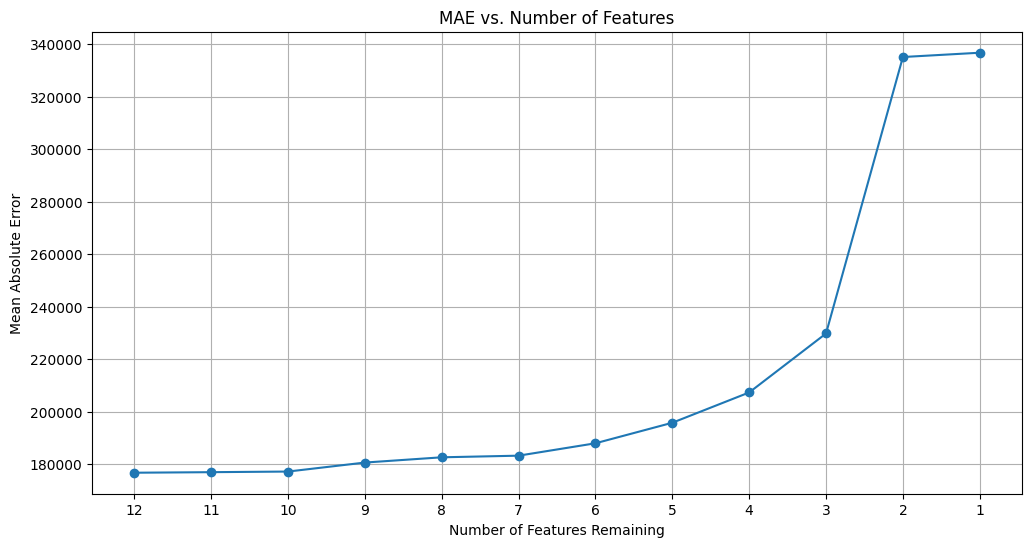

Final MAE with 1 features: 336795.8496840259


In [95]:
# Create DataFrame for feature importances for each step
# We now ensure that at each iteration, the correct number of features is used
importance_dfs = []
for i, (fi, features_at_step) in enumerate(zip(feature_importances, remaining_features_list), start=1):
    df = pd.DataFrame({f'Iteration {i}': fi}, index=features_at_step)
    importance_dfs.append(df)

# Concatenate all DataFrames to visualize the feature importance changes
importance_df = pd.concat(importance_dfs, axis=1)

# Plot the mean absolute error vs. number of features
plt.figure(figsize=(12, 6))
plt.plot(range(len(mae_values)), mae_values, marker='o')
plt.title('MAE vs. Number of Features')
plt.xlabel('Number of Features Remaining')
plt.ylabel('Mean Absolute Error')
plt.xticks(range(len(mae_values)), range(len(X.columns), 0, -1))
plt.grid()
plt.show()

# Display the final MAE with remaining features
print(f'Final MAE with {len(remaining_features_list[-1])} features: {mae_values[-1]}')

RAMDOM FORESTS

Train a random forest model on the Melbourne housing dataset to determine the most important features for predicting housing prices, and assess the model’s accuracy after removing the least important features.

Initial MAE with all features: 184122.78


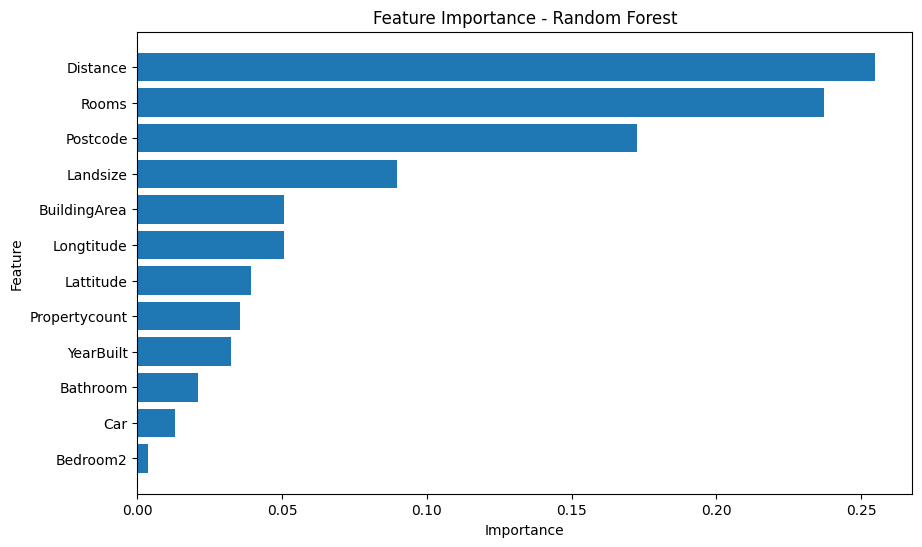

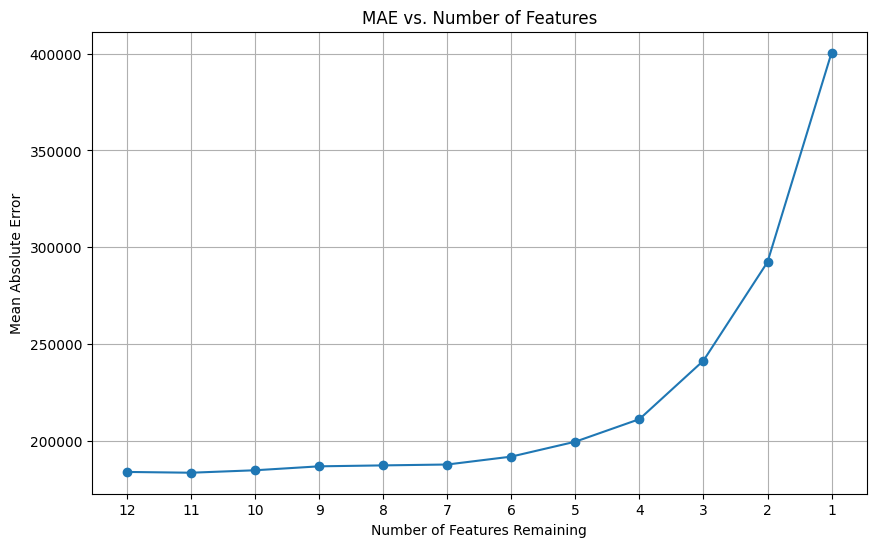

Final MAE with 1 features: 400438.21


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/melbourne_housing_raw.csv')

# Clean the dataset (handling NaN values, if necessary)
data.dropna(subset=['Price'], inplace=True)  # Ensure we have prices
# Keep only numeric features for simplicity
numeric_features = data.select_dtypes(include=[np.number]).drop(columns=['Price']).columns.tolist()

X = data[numeric_features]
y = data['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set and calculate the initial accuracy
y_pred = model.predict(X_test)
initial_mae = mean_absolute_error(y_test, y_pred)
print(f"Initial MAE with all features: {initial_mae:.2f}")

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

# Remove the least important features iteratively and evaluate performance
mae_values = [initial_mae]  # To store MAE values
remaining_features = X_train.columns.tolist()

while len(remaining_features) > 1:
    # Remove the least important feature
    least_important_feature = feature_importances.iloc[-1]['Feature']
    remaining_features.remove(least_important_feature)

    # Retrain the model with the remaining features
    model.fit(X_train[remaining_features], y_train)
    y_pred = model.predict(X_test[remaining_features])

    # Calculate and store MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

    # Update feature importance table
    feature_importances = feature_importances[feature_importances['Feature'] != least_important_feature]

# Plot the MAE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(range(len(mae_values)), mae_values, marker='o')
plt.title('MAE vs. Number of Features')
plt.xlabel('Number of Features Remaining')
plt.ylabel('Mean Absolute Error')
plt.xticks(range(len(mae_values)), range(len(X_train.columns), 0, -1))
plt.grid()
plt.show()

# Final output: MAE with the last set of features
print(f"Final MAE with {len(remaining_features)} features: {mae_values[-1]:.2f}")
